### Importing required libraries

In [22]:
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
import seaborn as sb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

### Importing datasets of five connections

In [23]:
first_dataset = pd.read_csv("five_conn/p32/first__connection_topo2_p032.csv")
second_dataset = pd.read_csv("five_conn/p32/second__connection_topo2_p032.csv")
third_dataset = pd.read_csv("five_conn/p32/third__connection_topo2_p032.csv")
fourth_dataset = pd.read_csv("five_conn/p32/fourth__connection_topo2_p032.csv")
fifth_dataset = pd.read_csv("five_conn/p32/fifth__connection_topo2_p032.csv")

In [24]:
df = pd.concat([first_dataset, second_dataset, third_dataset, fourth_dataset])
dataset = df.copy()

In [25]:
def get_max(train, test, col):
    return max(train[col].max(), test[col].max())

for col in df.columns[80:]:
    max_val = get_max(dataset, fifth_dataset, col)
    df[col] = df[col]/max_val

for col in fifth_dataset.columns[80:]:
    max_val = get_max(dataset, fifth_dataset, col)
    fifth_dataset[col] = fifth_dataset[col]/max_val

In [26]:
df

,1,2,3,4,5,6,7,8,9,10,...,80,ch,pw,path,s_ase,e_ase,s_osnr,e_osnr,s_gosnr,e_gosnr
0,0,0,0,0,0,0,0,0,0,0,...,0,0.8000,1.000315,0.666668,0.664598,0.664598,0.899070,0.899070,0.896048,0.896048
1,0,0,0,0,0,0,0,0,0,0,...,0,0.3375,1.000312,0.666668,0.658281,0.658281,0.900429,0.900429,0.896614,0.896614
2,0,0,0,0,0,0,0,0,0,0,...,0,0.8000,1.000317,0.666668,0.664594,0.664594,0.899070,0.899070,0.895580,0.895580
3,1,0,0,0,0,0,0,0,0,0,...,0,0.0125,1.000311,0.666668,0.653841,0.653841,0.901392,0.901392,0.896867,0.896867
4,1,0,0,0,0,0,0,0,0,0,...,0,0.3375,1.000315,0.666668,0.658276,0.658276,0.900429,0.900429,0.895946,0.895946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,1,1,1,1,1,1,1,1,1,1,...,1,0.9500,1.001394,1.000000,0.997371,0.997371,0.840771,0.840771,0.746476,0.746476
3236,1,1,1,1,1,1,1,1,1,1,...,1,0.9625,1.001368,1.000000,0.997693,0.997693,0.840739,0.840739,0.748730,0.748730
3237,1,1,1,1,1,1,1,1,1,1,...,1,0.9750,1.001333,1.000000,0.998038,0.998038,0.840709,0.840709,0.751843,0.751843
3238,1,1,1,1,1,1,1,1,1,1,...,1,0.9875,1.001281,1.000000,0.998431,0.998431,0.840683,0.840683,0.756732,0.756732


In [27]:
fifth_dataset

,1,2,3,4,5,6,7,8,9,10,...,80,ch,pw,path,s_ase,e_ase,s_osnr,e_osnr,s_gosnr,e_gosnr
0,0,0,0,0,0,0,0,0,0,0,...,0,0.5875,1.000625,1.0,0.991941,0.991941,0.841975,0.841975,0.836035,0.836035
1,0,0,0,0,0,1,0,0,0,0,...,0,0.0750,1.000620,1.0,0.981452,0.981452,0.843488,0.843488,0.836762,0.836762
2,0,0,0,0,0,1,0,0,0,0,...,0,0.5875,1.000627,1.0,0.991934,0.991934,0.841974,0.841974,0.835612,0.835612
3,0,0,0,0,0,1,0,0,0,0,...,0,0.0750,1.000623,1.0,0.981444,0.981444,0.843487,0.843487,0.836235,0.836235
4,0,0,0,0,0,1,0,0,0,0,...,0,0.4875,1.000640,1.0,0.989852,0.989852,0.842266,0.842266,0.833583,0.833583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,1,1,1,1,1,1,1,1,1,1,...,1,0.9500,1.001394,1.0,0.997371,0.997371,0.840771,0.840771,0.746476,0.746476
3236,1,1,1,1,1,1,1,1,1,1,...,1,0.9625,1.001368,1.0,0.997693,0.997693,0.840739,0.840739,0.748730,0.748730
3237,1,1,1,1,1,1,1,1,1,1,...,1,0.9750,1.001333,1.0,0.998038,0.998038,0.840709,0.840709,0.751843,0.751843
3238,1,1,1,1,1,1,1,1,1,1,...,1,0.9875,1.001281,1.0,0.998431,0.998431,0.840683,0.840683,0.756732,0.756732


In [28]:
df['pw'] = df['pw']/get_max(dataset, fifth_dataset, col)

In [29]:
fifth_dataset['pw'] = fifth_dataset['pw']/get_max(dataset, fifth_dataset, col)

In [30]:
df.to_csv('five_conn/norm/normalized_training_connection_topo_p032.csv')
fifth_dataset.to_csv('five_conn/norm/normalized_test_connection_topo_p032.csv')


In [31]:
X_train = df.copy()
X_train.drop(X_train.columns[-1:-4:-1], axis=1, inplace=True) #[-1:-6:-1]
y_train = df[df.columns[-1]]

In [32]:
X_train

,1,2,3,4,5,6,7,8,9,10,...,77,78,79,80,ch,pw,path,s_ase,e_ase,s_osnr
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.8000,0.034352,0.666668,0.664598,0.664598,0.899070
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.3375,0.034352,0.666668,0.658281,0.658281,0.900429
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.8000,0.034352,0.666668,0.664594,0.664594,0.899070
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0125,0.034352,0.666668,0.653841,0.653841,0.901392
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.3375,0.034352,0.666668,0.658276,0.658276,0.900429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.9500,0.034389,1.000000,0.997371,0.997371,0.840771
3236,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.9625,0.034388,1.000000,0.997693,0.997693,0.840739
3237,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.9750,0.034387,1.000000,0.998038,0.998038,0.840709
3238,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.9875,0.034385,1.000000,0.998431,0.998431,0.840683


In [33]:
X_test = fifth_dataset.copy()
X_test.drop(X_test.columns[-1:-4:-1], axis=1, inplace=True)
y_test = fifth_dataset[fifth_dataset.columns[-1]]

In [34]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(12960, 86) (12960,)
(3240, 86) (3240,)


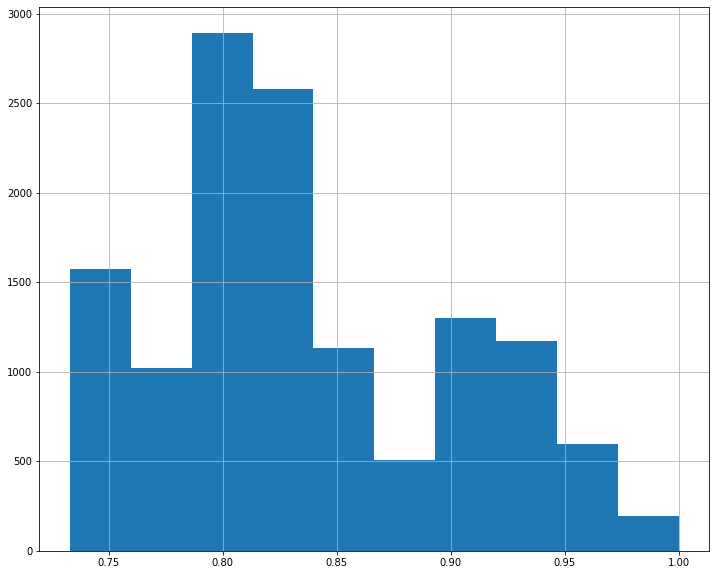

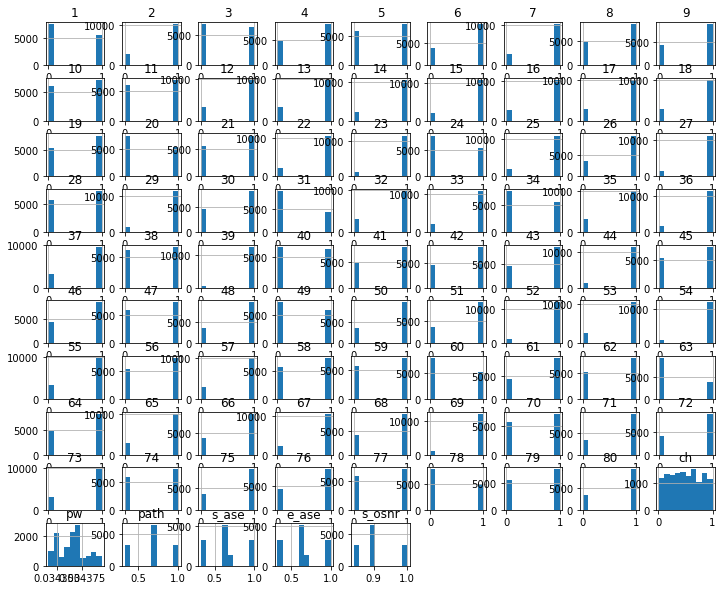

In [35]:
y_train.hist(figsize = (12,10))
X_train.hist(figsize = (12,10))
plt.show()

In [36]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [37]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(12960, 86) (12960,)
(3240, 86) (3240,)


### Lasso Model for p={}

In [38]:
C=[100,1000,1500,2000,3000,4000,10000, 12000, 15000, 20000, 25000]
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score


for Ci in C:
    model = Lasso(alpha=1/(2*Ci),max_iter=7000)
    _ = model.fit(X_train,y_train)
    preds = model.predict(X_test)
    print(f"C = {Ci}")
    print("Training score:", model.score(X_train, y_train))
    print("Testing score:", model.score(X_test, y_test))
    print("MAE of Lasso Regression:", mean_absolute_error(y_test, preds))
    print("RMSE of Lasso Regression:", np.sqrt(mean_squared_error(y_test, preds)), '\n')
    # print(f" coefficient value for c= {Ci} are: \n {model.coef_} and \n intercept = {model.intercept_}")
    # print(f"{Ci} {model.score(Xtest,ytest)}")

C = 100
Training score: 0.8042918135459964
Testing score: -3.2906597418860235
MAE of Lasso Regression: 0.046132028328084156
RMSE of Lasso Regression: 0.048808105967830064 

C = 1000
Training score: 0.9706245151336496
Testing score: 0.7645979711968303
MAE of Lasso Regression: 0.009509324736646589
RMSE of Lasso Regression: 0.011432336996947439 

C = 1500
Training score: 0.9734059462886365
Testing score: 0.7852828715254475
MAE of Lasso Regression: 0.009101395190439072
RMSE of Lasso Regression: 0.010918507139048978 

C = 2000
Training score: 0.9749756898247524
Testing score: 0.8078529292795625
MAE of Lasso Regression: 0.008556934696653888
RMSE of Lasso Regression: 0.010328727059430108 

C = 3000
Training score: 0.9764257661721666
Testing score: 0.8231210263084444
MAE of Lasso Regression: 0.007988643798770078
RMSE of Lasso Regression: 0.009909871475084278 

C = 4000
Training score: 0.9770941792131831
Testing score: 0.8236881413581743
MAE of Lasso Regression: 0.007762110617470267
RMSE of Las

### Ridge Model for p = .32

In [39]:
C=[5,10,50,100,1000,1500,2000,3000,4000,10000]
for Ci in C:
    ridge = Ridge(alpha=1/(2*Ci),max_iter=10000)
    _ = ridge.fit(X_train,y_train)
    pred_train_lr= ridge.predict(X_test)
    print(f"C = {Ci}")
    # print(f" coefficient value for c= {Ci} are: \n {model.coef_} and \n intercept = {model.intercept_}")
    print("Training score:", ridge.score(X_train, y_train))
    print("Testing score:", ridge.score(X_test, y_test))
    print("MAE of Lasso Regression:", mean_absolute_error(y_test, pred_train_lr))
    print("RMSE of Lasso Regression:", np.sqrt(mean_squared_error(y_test, pred_train_lr)), '\n')


C = 5
Training score: 0.9795348534148626
Testing score: 0.8204612676301661
MAE of Lasso Regression: 0.007865870130993925
RMSE of Lasso Regression: 0.009984101659887444 

C = 10
Training score: 0.9799059313983017
Testing score: 0.8318470164642046
MAE of Lasso Regression: 0.0075932471385553296
RMSE of Lasso Regression: 0.009662337561898797 

C = 50
Training score: 0.9803952063843426
Testing score: 0.8449259600335057
MAE of Lasso Regression: 0.0073216942816819825
RMSE of Lasso Regression: 0.009278963529749445 

C = 100
Training score: 0.980460214776333
Testing score: 0.8466648346633517
MAE of Lasso Regression: 0.0072927197698095005
RMSE of Lasso Regression: 0.009226793480087722 

C = 1000
Training score: 0.980498481886304
Testing score: 0.848097837432011
MAE of Lasso Regression: 0.007268047228701458
RMSE of Lasso Regression: 0.009183577504271163 

C = 1500
Training score: 0.9805007316423836
Testing score: 0.848163471774936
MAE of Lasso Regression: 0.007266724060635201
RMSE of Lasso Regres

In [40]:
X

NameError: name 'X' is not defined

In [ ]:
Cx = dataset.corr()
fig = plt.figure(figsize = (15,15))
sb.heatmap(Cx, vmax = .8, square = True)
plt.show()

### RandomForest Model for p=.32

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

estimators=[100, 200, 300, 1000]
for  Ei in estimators:
    print(f"Estimator - {Ei}")
    model = RandomForestRegressor(n_estimators=Ei)
    model.fit(X_train,y_train)
    predicted = model.predict(X_test)
    MAE = mean_absolute_error(y_test , predicted)
    print('Random forest validation MAE = ', MAE)
    # Display accuracy score
    print(f'Random forest accuracy = ', model.score(X_test, y_test))
    print(f'RMSE forest = ', np.sqrt(mean_squared_error(y_test , predicted)))

### LinearRegression Model for p=.32


In [ ]:
# LINEARREGRESSION MODEL 

from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train) 
print("accuracy score for linear: ", linear.score(X_test,y_test))
print("RMSE for linear :",np.sqrt(mean_squared_error(y_test,linear.predict(X_test))))
r2_score(y_test,linear.predict(X_test))